In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

$\frac{da}{dt}=a H_0(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda)^{1/2}$

In [2]:
#Definindo o intervalo de tempo
time=np.linspace(1e-6,14e9,50000)

plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})

In [3]:
Mpc2km= 3.1e19
seg2year= 3.2e-8

class Parameters:
    '''Classe que contém os parâmetros cosmológicos'''
    
    def __init__(self, H_0, Omega_m, Omega_rad, Omega_lambda, label ):
        self.H_0= H_0
        self.mat= Omega_m
        self.rad=  Omega_rad
        self.lamb= Omega_lambda
        self.label=label
        
    def Param(self):
        '''Retorna um tuple com os valores dos parâmetros e da mudança de unidades
        para ser aplicado no argumento args do odeint'''
        
        return (self.H_0,Mpc2km, seg2year, self.mat, self.rad, self.lamb)
    
    def Scale_factor(self):
        '''Definição da equação de Friedmann como escrito acima.
        Cálculo do fator de escala com a função odeint
        Produção do gráfico'''
        
        Friedmann= lambda  a, time, H_0, Mpc2km, seg2year, Omega_m, Omega_rad, Omega_lambda : \
         a * self.H_0 / (Mpc2km * seg2year) *(self.mat / a**3 + self.rad / a**4 + self.lamb)**(1/2)
        
        scale_factor=integrate.odeint(Friedmann,1e-18,time,args=self.Param())
        
        
        ax.plot(time,scale_factor,label=self.label)
        ax.legend()
        ax.set_xlabel('Time')
        ax.set_ylabel('Scale Factor')
        #ax.set_title('Age of the Universe')
        return

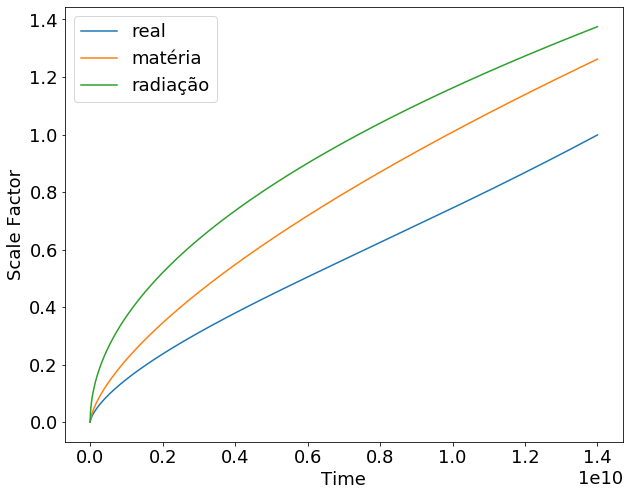

In [4]:
fig,ax=plt.subplots()

real=Parameters(66.98,0.320,0.0,0.680,'real')
real.Scale_factor()

materia=Parameters(66.98,1,0,0,'matéria')
materia.Scale_factor()

radiação=Parameters(66.98,0,1,0,'radiação')
radiação.Scale_factor()
